In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2


In [ ]:
#Listing files in diretory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Alzheimer_s Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1142.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1145.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1152.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1162.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1158.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1177.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1141.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1180.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1144.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1139.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildDem1178.jpg
/content/drive/MyDrive/Alzheimer_s Dataset/VeryMildDemented/verymildD

In [ ]:
images = []
labels = []

dir = '/content/drive/MyDrive/Alzheimer_s Dataset'
for dirname, subdirs, filenames in tqdm(os.walk(dir)):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        label = os.path.basename(dirname)
        images.append(image_path)
        labels.append(label)

df = pd.DataFrame({'image': images, 'label': labels})
df


5it [00:00, 57.00it/s]


,image,label
0,/content/drive/MyDrive/Alzheimer_s Dataset/Ver...,VeryMildDemented
1,/content/drive/MyDrive/Alzheimer_s Dataset/Ver...,VeryMildDemented
2,/content/drive/MyDrive/Alzheimer_s Dataset/Ver...,VeryMildDemented
3,/content/drive/MyDrive/Alzheimer_s Dataset/Ver...,VeryMildDemented
4,/content/drive/MyDrive/Alzheimer_s Dataset/Ver...,VeryMildDemented
...,...,...
6395,/content/drive/MyDrive/Alzheimer_s Dataset/Non...,NonDemented
6396,/content/drive/MyDrive/Alzheimer_s Dataset/Non...,NonDemented
6397,/content/drive/MyDrive/Alzheimer_s Dataset/Non...,NonDemented
6398,/content/drive/MyDrive/Alzheimer_s Dataset/Non...,NonDemented


<ipython-input-6-26c768ecb44b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.label, palette='Set1')


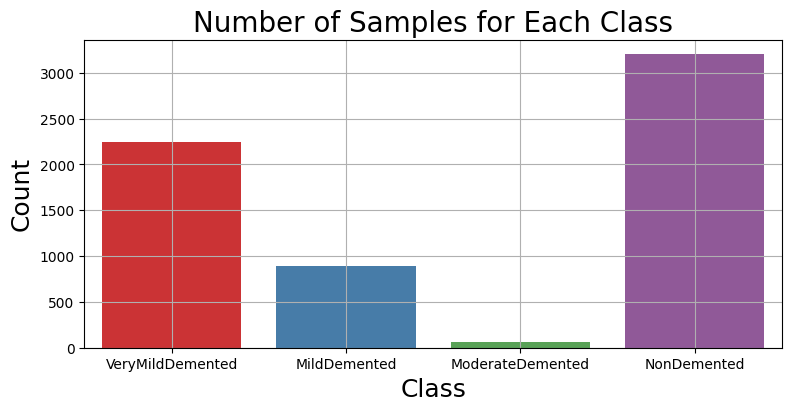

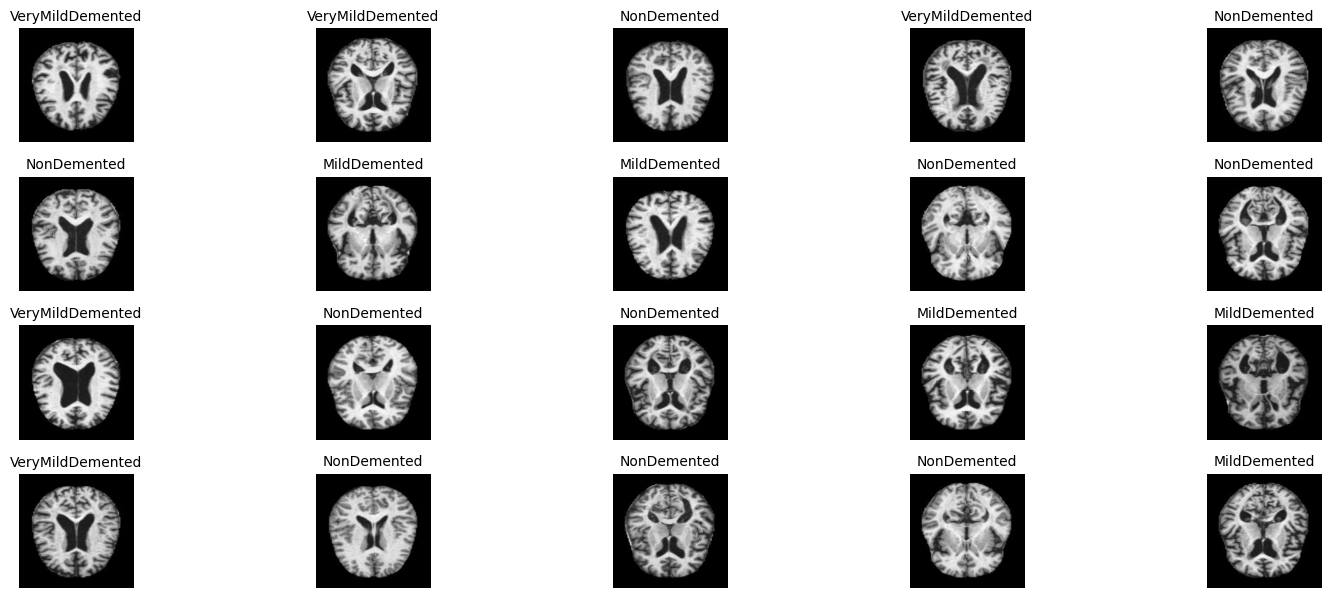

In [ ]:
# Plotting the class distribution
plt.figure(figsize=(9,4))
sns.countplot(x=df.label, palette='Set1')
plt.xlabel("Class", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title('Number of Samples for Each Class', fontsize=20)
plt.grid(True)
plt.show()

# Displaying random images from the dataset
plt.figure(figsize=(15, 15))  # Adjust the overall figure size
num_images = 20  # Number of images to display
random_indices = np.random.randint(0, len(df), num_images)
for idx, i in enumerate(random_indices):
    plt.subplot(10, 5, idx + 1)
    img_path = df.image[i]
    img = cv2.imread(img_path)

    img = cv2.resize(img, (180, 180))
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i], fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Working_directory = '/content/drive/MyDrive/Alzheimer_s Dataset'

CLASSES = ['Mild_Demented',
           'Moderate_Demented',
           'Non_Demented',
           'Very_Mild_Demented']

X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(Working_directory, target_size=(150, 150),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 6400 images belonging to 4 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'next'

In [ ]:
#   Number of samples in classes
from collections import Counter
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 896), (1, 64), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 631), (1, 42), (2, 2240), (3, 1567)]
Validation	 [(0, 214), (1, 21), (2, 763), (3, 538)]
Test      	 [(0, 51), (1, 1), (2, 197), (3, 135)]


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (4480, 150, 150, 3)
y_train shape: (4480, 4)
X_val shape: (1536, 150, 150, 3)
y_val shape: (1536, 4)


**DEFINING CNN**

In [ ]:
from tensorflow.keras.initializers import glorot_uniform
# Define a function to create the CNN model
def create_cnn_model(input_shape=(150, 150, 3)):
    seed_value = 42
  # Define the initializer
    init = glorot_uniform(seed=seed_value)
    model = Sequential()

    model.add(Input(shape=input_shape))

    model.add(Convolution2D(16, 5, kernel_initializer=init))
    model.add(ReLU())
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Convolution2D(32, 5, kernel_initializer=init))
    model.add(ReLU())
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Convolution2D(64, 5, kernel_initializer=init))
    model.add(ReLU())
    model.add(AveragePooling2D(pool_size=(2,2)))

    model.add(Convolution2D(128, 5, kernel_initializer=init))
    model.add(ReLU())
    model.add(AveragePooling2D(pool_size=(2,2)))


    model.add(Dropout(0.01))

    model.add(Flatten())

    model.add(Dense(256, kernel_initializer=init))
    model.add(ReLU())
    model.add(Dropout(0.03))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

**TRAINING AND PLOTTING**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Function to train and plot accuracy
def train_and_plot(model, X_train, y_train, X_val, y_val, epochs=25):

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=2)
    # Calculate and plot confusion matrix
    y_pred = np.argmax(model.predict(X_val), axis=1)
    y_true = np.argmax(y_val, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, classes=['MILD_DEMENTED', 'MODERATE_DEMENTED', 'NON_DEMENTED', 'VERY_MILD_DEMENTED'])
    plt.show()

    # Plot training history
    plot_training_history(history)


def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('history_plot.png')
    plt.show()


    plt.tight_layout()


def plot_confusion_matrix(cm, classes, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
# Input shape
input_shape = ( 150, 150, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Convolution2D, ReLU, AveragePooling2D, Dropout, Flatten, Dense, Softmax

# Create CNN model
cnn_model = create_cnn_model(input_shape)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 re_lu (ReLU)                (None, 146, 146, 16)      0         
                                                                 
 average_pooling2d (Average  (None, 73, 73, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 32)        12832     
                                                                 
 re_lu_1 (ReLU)              (None, 69, 69, 32)        0         
                                                                 
 average_pooling2d_1 (Avera  (None, 34, 34, 32)        0         
 gePooling2D)                                           

Epoch 1/25
140/140 - 243s - loss: 1.0488 - accuracy: 0.4799 - val_loss: 1.0134 - val_accuracy: 0.5000 - 243s/epoch - 2s/step
Epoch 2/25
140/140 - 202s - loss: 1.0051 - accuracy: 0.5127 - val_loss: 0.9392 - val_accuracy: 0.5254 - 202s/epoch - 1s/step
Epoch 3/25
140/140 - 198s - loss: 0.9480 - accuracy: 0.5339 - val_loss: 0.9194 - val_accuracy: 0.5378 - 198s/epoch - 1s/step
Epoch 4/25
140/140 - 194s - loss: 0.9299 - accuracy: 0.5429 - val_loss: 0.8881 - val_accuracy: 0.5560 - 194s/epoch - 1s/step
Epoch 5/25
140/140 - 199s - loss: 0.8747 - accuracy: 0.5754 - val_loss: 0.8480 - val_accuracy: 0.5951 - 199s/epoch - 1s/step
Epoch 6/25
140/140 - 197s - loss: 0.8255 - accuracy: 0.6136 - val_loss: 0.7953 - val_accuracy: 0.6348 - 197s/epoch - 1s/step
Epoch 7/25
140/140 - 200s - loss: 0.7563 - accuracy: 0.6435 - val_loss: 0.7210 - val_accuracy: 0.6660 - 200s/epoch - 1s/step
Epoch 8/25
140/140 - 198s - loss: 0.6723 - accuracy: 0.6926 - val_loss: 0.7197 - val_accuracy: 0.6497 - 198s/epoch - 1s/step


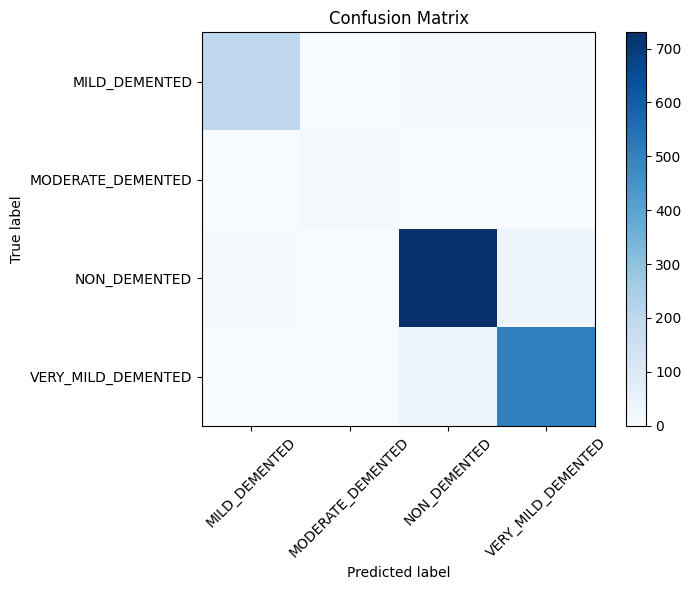

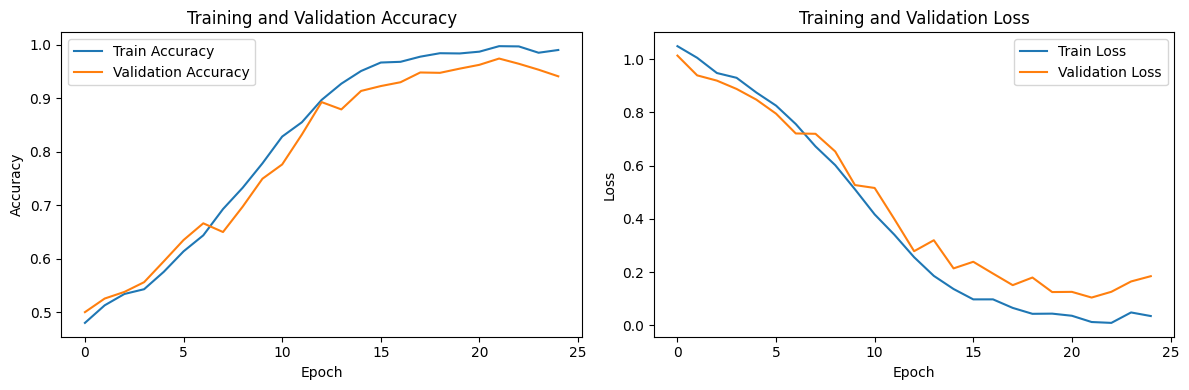

<Figure size 640x480 with 0 Axes>

In [ ]:
train_and_plot(cnn_model, X_train, y_train, X_val, y_val)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming cnn_model is your trained CNN model and X_val, y_val are your validation data
model_predictions = np.argmax(cnn_model.predict(X_val), axis=1)

# Calculate precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_val, axis=1), model_predictions, average='weighted')

# Print precision, recall, F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)



48/48 [==============================] - 0s 8ms/step
Precision: 0.2140379796353411
Recall: 0.154296875
F1-score: 0.061306455626039626


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **DEFINING RESNET50**

In [ ]:
def create_resnet_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

    # Use a lower learning rate
    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create ResNet model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Convolution2D, ReLU, AveragePooling2D, Dropout, Flatten, Dense, Softmax
from tensorflow.keras.models import Sequential
resnet_model = create_resnet_model(input_shape)
resnet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               

Epoch 1/25
140/140 - 521s - loss: 1.2320 - accuracy: 0.4290 - val_loss: 1.1281 - val_accuracy: 0.4961 - 521s/epoch - 4s/step
Epoch 2/25
140/140 - 493s - loss: 1.1043 - accuracy: 0.4654 - val_loss: 1.0680 - val_accuracy: 0.4961 - 493s/epoch - 4s/step
Epoch 3/25
140/140 - 509s - loss: 1.0787 - accuracy: 0.4804 - val_loss: 1.0495 - val_accuracy: 0.4961 - 509s/epoch - 4s/step
Epoch 4/25
140/140 - 508s - loss: 1.0641 - accuracy: 0.4906 - val_loss: 1.0504 - val_accuracy: 0.4961 - 508s/epoch - 4s/step
Epoch 5/25
140/140 - 493s - loss: 1.0442 - accuracy: 0.4917 - val_loss: 1.0453 - val_accuracy: 0.4961 - 493s/epoch - 4s/step
Epoch 6/25
140/140 - 509s - loss: 1.0482 - accuracy: 0.4998 - val_loss: 1.0503 - val_accuracy: 0.4961 - 509s/epoch - 4s/step
Epoch 7/25
140/140 - 495s - loss: 1.0440 - accuracy: 0.5009 - val_loss: 1.0514 - val_accuracy: 0.4961 - 495s/epoch - 4s/step
Epoch 8/25
140/140 - 499s - loss: 1.0434 - accuracy: 0.5027 - val_loss: 1.0507 - val_accuracy: 0.4961 - 499s/epoch - 4s/step


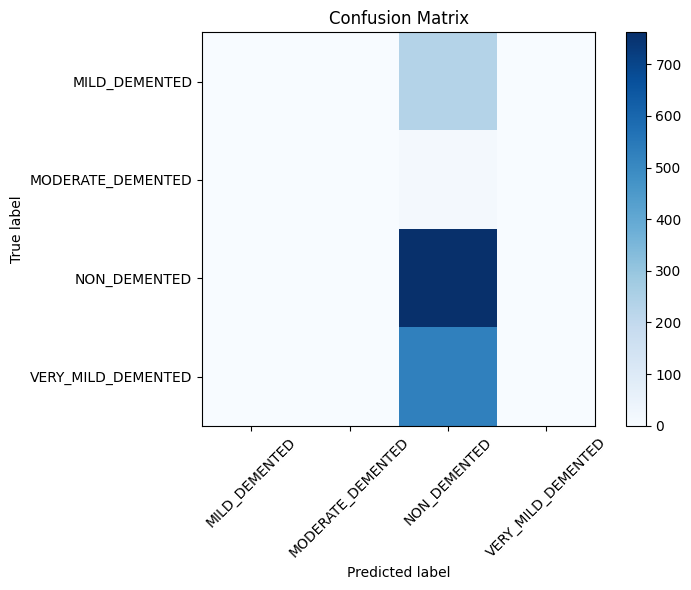

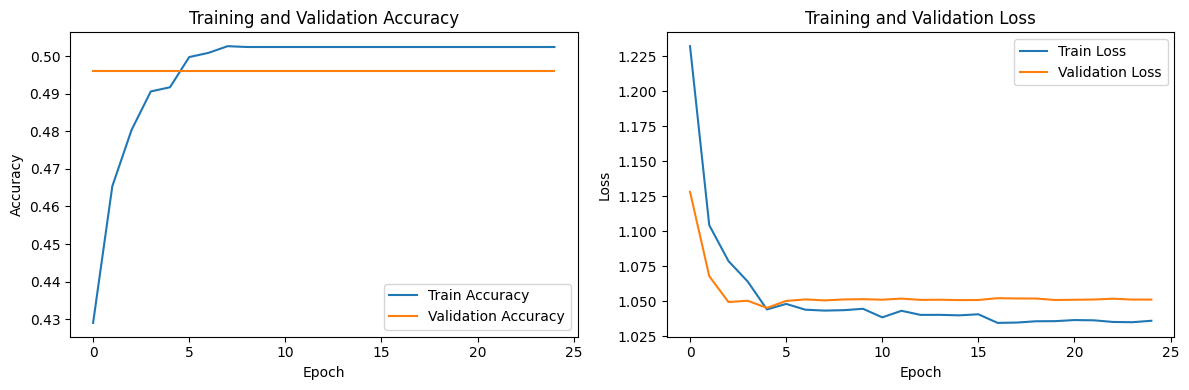

<Figure size 640x480 with 0 Axes>

In [ ]:
train_and_plot(resnet_model, X_train, y_train, X_val, y_val)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming cnn_model is your trained CNN model and X_val, y_val are your validation data
model_predictions = np.argmax(resnet_model.predict(X_val), axis=1)

# Calculate precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_val, axis=1), model_predictions, average='weighted')

# Print precision, recall, F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

48/48 [==============================] - 5s 47ms/step
Precision: 0.11861207750108509
Recall: 0.3444010416666667
F1-score: 0.17645341505246168


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DEFINING LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Reshape
from tensorflow.keras.initializers import glorot_uniform

def create_lstm_model(input_shape):
    seed_value = 42
    # Define the initializer
    init = glorot_uniform(seed=seed_value)
    model = Sequential()

    model.add(Input(shape=input_shape))

    # Reshape the input to be compatible with LSTM
    model.add(Reshape((-1, input_shape[-1])))  # Flatten the image while preserving channels

    model.add(LSTM(64, kernel_initializer=init, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(128, kernel_initializer=init))
    model.add(Dropout(0.2))

    model.add(Dense(256, kernel_initializer=init, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


lstm_model = create_lstm_model(input_shape=input_shape)
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 22500, 3)          0         
                                                                 
 lstm_1 (LSTM)               (None, 22500, 64)         17408     
                                                                 
 dropout_9 (Dropout)         (None, 22500, 64)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dropout_11 (Dropout)        (None, 256)              

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming cnn_model is your trained CNN model and X_val, y_val are your validation data
model_predictions = np.argmax(lstm_model.predict(X_val), axis=1)

# Calculate precision, recall, F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_val, axis=1), model_predictions, average='weighted')

# Print precision, recall, F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

48/48 [==============================] - 23s 472ms/step
Precision: 0.02107789781358507
Recall: 0.14518229166666666
F1-score: 0.03681142813151412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/25
140/140 - 208s - loss: 1.3455 - accuracy: 0.5033 - val_loss: 1.3072 - val_accuracy: 0.4928 - 208s/epoch - 1s/step
Epoch 2/25
140/140 - 203s - loss: 1.2760 - accuracy: 0.5056 - val_loss: 1.2473 - val_accuracy: 0.4928 - 203s/epoch - 1s/step
Epoch 3/25
140/140 - 202s - loss: 1.2237 - accuracy: 0.5056 - val_loss: 1.2027 - val_accuracy: 0.4928 - 202s/epoch - 1s/step
Epoch 4/25
140/140 - 202s - loss: 1.1846 - accuracy: 0.5056 - val_loss: 1.1694 - val_accuracy: 0.4928 - 202s/epoch - 1s/step
Epoch 5/25
140/140 - 201s - loss: 1.1551 - accuracy: 0.5056 - val_loss: 1.1443 - val_accuracy: 0.4928 - 201s/epoch - 1s/step
Epoch 6/25
140/140 - 202s - loss: 1.1329 - accuracy: 0.5056 - val_loss: 1.1253 - val_accuracy: 0.4928 - 202s/epoch - 1s/step
Epoch 7/25
140/140 - 202s - loss: 1.1158 - accuracy: 0.5056 - val_loss: 1.1107 - val_accuracy: 0.4928 - 202s/epoch - 1s/step
Epoch 8/25
140/140 - 201s - loss: 1.1025 - accuracy: 0.5056 - val_loss: 1.0991 - val_accuracy: 0.4928 - 201s/epoch - 1s/step


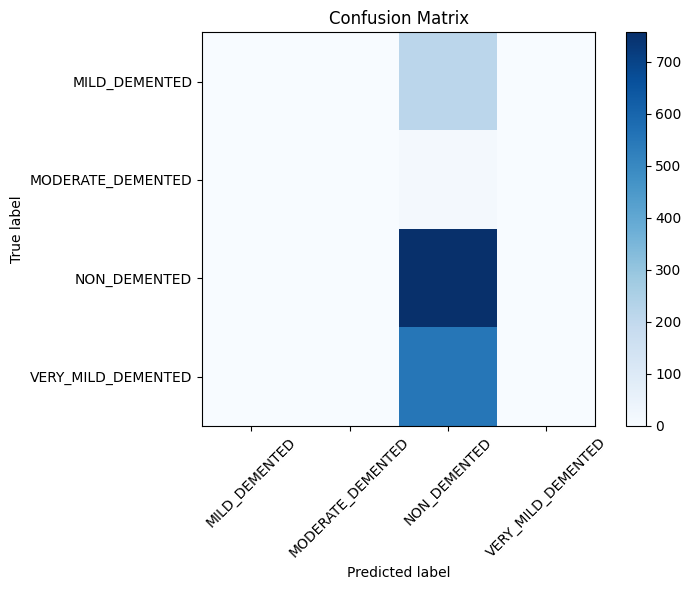

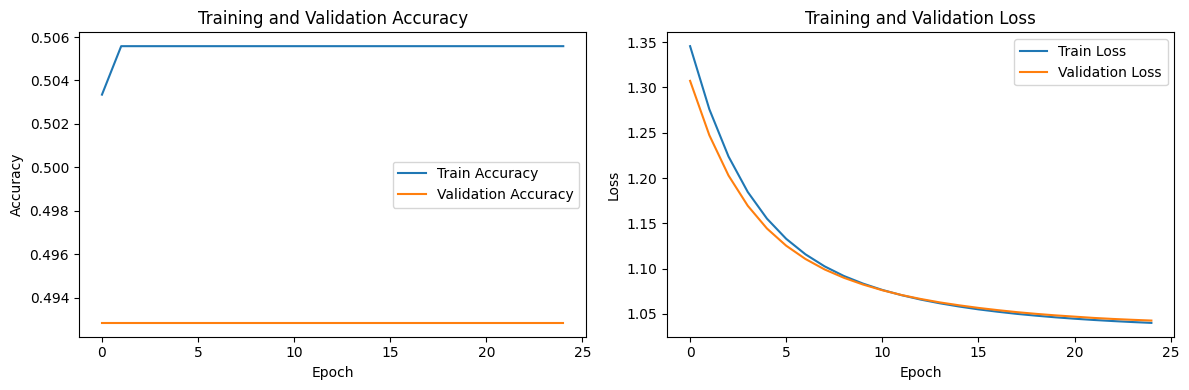

<Figure size 640x480 with 0 Axes>

In [ ]:
train_and_plot(lstm_model, X_train, y_train, X_val, y_val)